# Classification using K-Nearest Neighbour Algorithm

In [1]:
#importing all the required libraries and packages
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

### About the dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

The objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Source of dataset: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

In [2]:
#Loading the Dataset
df = pd.read_csv("knn_dataset.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

##### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [5]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
y = df[['custcat']].values

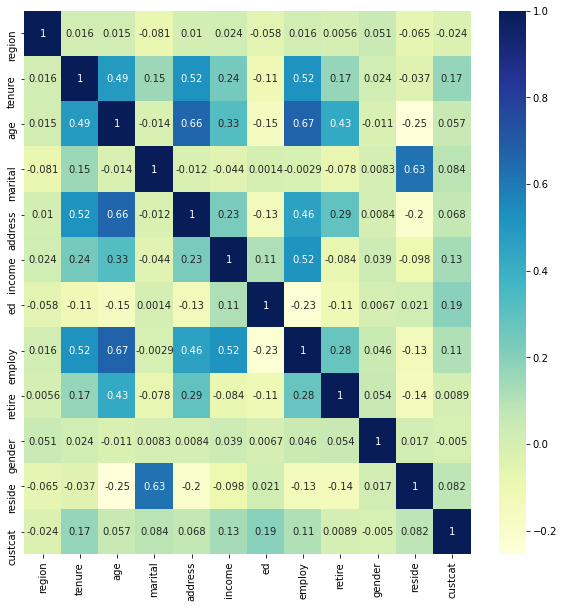

In [6]:
# displaying heatmap of correlation matrix
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

- Correlation of region anf gender with custCat ie Target variable is very less
- Dropping the region and gender column

In [7]:
df.drop(["region", "gender"], axis=1)

,tenure,age,marital,address,income,ed,employ,retire,reside,custcat
0,13,44,1,9,64.0,4,5,0.0,2,1
1,11,33,1,7,136.0,5,5,0.0,6,4
2,68,52,1,24,116.0,1,29,0.0,2,3
3,33,33,0,12,33.0,2,0,0.0,1,1
4,23,30,1,9,30.0,1,2,0.0,4,3
...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,0,27.0,3,0,0.0,3,1
996,7,34,0,2,22.0,5,5,0.0,1,1
997,67,59,0,40,944.0,5,33,0.0,1,4
998,70,49,0,18,87.0,2,22,0.0,1,3


### Normalize Data

Data Standardization give data zero mean and unit variance, it is good, especially for algorithms such as KNN which is based on distance of cases:

In [8]:
# preprocessing the dataset -> standardisation
x_scaled = preprocessing.StandardScaler().fit_transform(x)
x_scaled[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [9]:
df_x = pd.DataFrame(x_scaled)
df_x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


### Train Test Split

In [10]:
#spliting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_scaled, y, test_size=0.2, random_state=4)
y_train.resize(X_train.shape[0],)
y_test.resize(X_test.shape[0],)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Classification

#### K nearest neighbor (KNN)

In [14]:
#Training and predicting the model using knn classifier
ks = 45   # Total K 
accuracy=np.zeros(ks-1)
for k in range(1,ks):     # Accuracy check for each k till total k
#Train Model and Predict  
    trained = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = trained.predict(X_test)
    print("Test accuracy at k= {}: {}".format(k, metrics.accuracy_score(y_test, yhat)))
    accuracy[k-1]=metrics.accuracy_score(y_test, yhat)

Test accuracy at k= 1: 0.3
Test accuracy at k= 2: 0.29
Test accuracy at k= 3: 0.315
Test accuracy at k= 4: 0.32
Test accuracy at k= 5: 0.315
Test accuracy at k= 6: 0.31
Test accuracy at k= 7: 0.335
Test accuracy at k= 8: 0.325
Test accuracy at k= 9: 0.34
Test accuracy at k= 10: 0.33
Test accuracy at k= 11: 0.315
Test accuracy at k= 12: 0.34
Test accuracy at k= 13: 0.33
Test accuracy at k= 14: 0.315
Test accuracy at k= 15: 0.34
Test accuracy at k= 16: 0.36
Test accuracy at k= 17: 0.355
Test accuracy at k= 18: 0.35
Test accuracy at k= 19: 0.345
Test accuracy at k= 20: 0.335
Test accuracy at k= 21: 0.35
Test accuracy at k= 22: 0.36
Test accuracy at k= 23: 0.37
Test accuracy at k= 24: 0.365
Test accuracy at k= 25: 0.365
Test accuracy at k= 26: 0.365
Test accuracy at k= 27: 0.35
Test accuracy at k= 28: 0.36
Test accuracy at k= 29: 0.38
Test accuracy at k= 30: 0.385
Test accuracy at k= 31: 0.395
Test accuracy at k= 32: 0.395
Test accuracy at k= 33: 0.38
Test accuracy at k= 34: 0.37
Test accu

#### Plot model accuracy for Different number of Neighbors

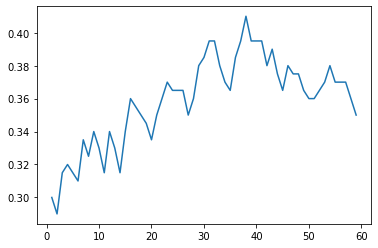

In [12]:
# k vs Accuracy graph
plt.plot(range(1,ks),accuracy)

In [15]:
print( "The best accuracy was", accuracy.max(), "with k=", accuracy.argmax()+1) 

The best accuracy was 0.41 with k= 38
